In [2]:
# import neccessary library
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# FLS : Mamdani
# Fuzzification Module

# universe set
bmi = np.arange(0,40,1) # X
shoulder_hip_rating = np.arange(0,11,1) # Y
exercise_level = np.arange(0,11,1) # Z

# membership function

# input mf
underweight = fuzz.trapmf(bmi,[0,0,17,20])
normal = fuzz.trapmf(bmi,[17,18,25,27])
overweight = fuzz.trapmf(bmi,[24,26,28,30])
obes = fuzz.trapmf(bmi,[28,30,40,40])

ectomorph = fuzz.trimf(shoulder_hip_rating,[0,0,5])
mesomorph = fuzz.trimf(shoulder_hip_rating,[0,5,10])
endomorph = fuzz.trimf(shoulder_hip_rating,[5,10,10])

# output mf

beginner = fuzz.trimf(exercise_level,[0,0,5])
intermediate = fuzz.trimf(exercise_level,[0,5,10])
advance = fuzz.trimf(exercise_level,[5,10,10])


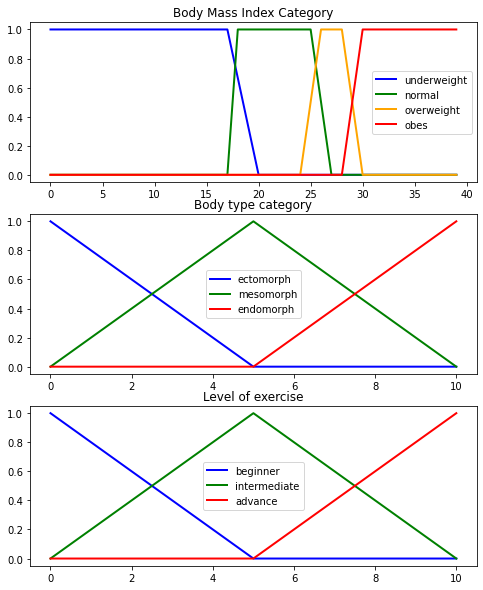

In [4]:
# visualize mf

fig ,(g1,g2,g3) = plt.subplots(nrows = 3, figsize = (8,10))
g1.plot(bmi,underweight,'b',linewidth = 2,label='underweight')
g1.plot(bmi,normal,'g',linewidth = 2,label='normal')
g1.plot(bmi,overweight,'orange',linewidth = 2,label='overweight')
g1.plot(bmi,obes,'r',linewidth = 2,label='obes')
g1.set_title('Body Mass Index Category')
g1.legend()

g2.plot(shoulder_hip_rating,ectomorph,'b',linewidth = 2,label='ectomorph')
g2.plot(shoulder_hip_rating,mesomorph,'g',linewidth = 2,label='mesomorph')
g2.plot(shoulder_hip_rating,endomorph,'r',linewidth = 2,label='endomorph')
g2.set_title('Body type category')
g2.legend()

g3.plot(exercise_level,beginner,'b',linewidth = 2,label='beginner')
g3.plot(exercise_level,intermediate,'g',linewidth = 2,label='intermediate')
g3.plot(exercise_level,advance,'r',linewidth = 2,label='advance')
g3.set_title('Level of exercise')
g3.legend()


In [30]:
# user input 


weight = 63
height = 1.76
# bmi formula : weight(kg)/(height*height),m^2
x = weight/(height*height)
y = 9 # body type rate 1 - 10

print(x)

30.716368179925034


In [31]:
# Fuzzy rules/modus ponens(p --> q)

# knowledge base
"""
Rule 1 : If x is underweight and y is ectomorph,then z is beginner
Rule 2 : If x is underweight and y is mesomorph,then z is beginner
Rule 3 : If x is underweight and y is endomorph,then z is intermediate
Rule 4 : If x is normal and y is ectomorph,then z is advance
Rule 5 : If x is normal and y is mesomorph,then z is advance
Rule 6 : If x is normal and y is endomorph,then z is intermediate
Rule 7 : If x is overweight and y is ectomorph,then z is advance
Rule 8 : If x is overweight and y is mesomorph,then z is advance
Rule 9 : If x is overweight and y is endomorph,then z is advance
Rule 10: If x is obes,then z is advance
"""
is_underweight = fuzz.interp_membership(bmi,underweight,x)
is_normal = fuzz.interp_membership(bmi,normal,x)
is_overweight = fuzz.interp_membership(bmi,overweight,x)
is_obes = fuzz.interp_membership(bmi,obes,x)
is_ectomorph = fuzz.interp_membership(shoulder_hip_rating,ectomorph,y)
is_mesomorph = fuzz.interp_membership(shoulder_hip_rating,mesomorph,y)
is_endomorph = fuzz.interp_membership(shoulder_hip_rating,endomorph,y)


# inference engine(min)
# p part/trigger
rule_1 = min(is_underweight,is_ectomorph)
rule_2 = min(is_underweight,is_mesomorph)
rule_3 = min(is_underweight,is_endomorph)

rule_4 = min(is_normal,is_ectomorph)
rule_5 = min(is_normal,is_mesomorph)
rule_6 = min(is_normal,is_endomorph)

rule_7 = min(is_overweight,is_ectomorph)
rule_8 = min(is_overweight,is_mesomorph)
rule_9 = min(is_overweight,is_endomorph)


# q part,z universe
r1_out = np.fmin(rule_1,beginner)
r2_out = np.fmin(rule_2,beginner)
r3_out = np.fmin(rule_3,intermediate)

r4_out = np.fmin(rule_4,intermediate)
r5_out = np.fmin(rule_5,advance)
r6_out = np.fmin(rule_6,advance)

r7_out = np.fmin(rule_7,intermediate)
r8_out = np.fmin(rule_8,advance)
r9_out = np.fmin(rule_9,advance)

#direct p --> q
r10_out = np.fmin(is_obes,advance)


print(r1_out)
print(r2_out)
print(r3_out)
print(r4_out)
print(r5_out)
print(r6_out)
print(r7_out)
print(r8_out)
print(r9_out)
print(r10_out)



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.  0.  0.  0.  0.  0.  0.2 0.4 0.6 0.8 1. ]


In [32]:
# inference engine(max)
temp_1 = np.fmax(r1_out,r2_out)
temp_2 = np.fmax(temp_1,r3_out)
temp_3 = np.fmax(temp_2,r4_out)
temp_4 = np.fmax(temp_3,r5_out)
temp_5 = np.fmax(temp_4,r6_out)
temp_6 = np.fmax(temp_5,r7_out)
temp_7 = np.fmax(temp_6,r8_out)
temp_8 = np.fmax(temp_7,r9_out)
fuzz_out = np.fmax(temp_8,r10_out) # final z set

print(fuzz_out)

[0.  0.  0.  0.  0.  0.  0.2 0.4 0.6 0.8 1. ]


In [33]:
# defuzzification
crisp_output_centroid = fuzz.defuzz(exercise_level,fuzz_out,"centroid")
crisp_output_bisector = fuzz.defuzz(exercise_level,fuzz_out,"bisector")
crisp_output_mom = fuzz.defuzz(exercise_level,fuzz_out,"mom")
crisp_output_lom = fuzz.defuzz(exercise_level,fuzz_out,"lom")
crisp_output_som = fuzz.defuzz(exercise_level,fuzz_out,"som")
print("centroid output         :" , round(crisp_output_centroid))
print("bisector output         :" , round(crisp_output_bisector))
print("max of maxima output    :" , round(crisp_output_mom))
print("least of maxima output  :" , round(crisp_output_lom))
print("center of maxima output :" , round(crisp_output_som))

centroid output         : 8
bisector output         : 9
max of maxima output    : 10
least of maxima output  : 10
center of maxima output : 10
